# Getting Started

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
data = pd.read_csv('/content/Mall_Customers.csv')

In [ ]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Preprocessing

In [ ]:
data.drop('CustomerID', axis=1, inplace=True)

In [ ]:
encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])

gender_mappings = {index: label for index, label in enumerate(encoder.classes_)}
gender_mappings

{0: 'Female', 1: 'Male'}

In [ ]:
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [ ]:
scaled_data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,-0.886405,-0.276302,2.268791,1.118061
196,-0.886405,0.441365,2.497807,-0.861839
197,1.128152,-0.491602,2.497807,0.923953
198,1.128152,-0.491602,2.917671,-1.250054


# Clustering

In [ ]:
max_clusters = 50

In [ ]:
kmeans_tests = [KMeans(n_clusters=i, n_init=10) for i in range(1, max_clusters)]
inertias = [kmeans_tests[i].fit(scaled_data).inertia_ for i in range(len(kmeans_tests))]

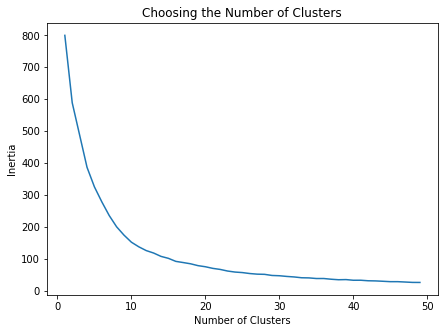

In [ ]:
plt.figure(figsize=(7, 5))
plt.plot(range(1, max_clusters), inertias)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Choosing the Number of Clusters")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=10, n_init=10)
kmeans.fit(scaled_data)

KMeans(n_clusters=10)

In [ ]:
clusters = kmeans.predict(scaled_data)
clusters

array([3, 3, 8, 4, 8, 4, 8, 4, 1, 4, 1, 4, 8, 4, 8, 3, 8, 3, 1, 4, 3, 3,
       8, 3, 8, 3, 8, 3, 8, 4, 1, 4, 1, 3, 8, 4, 8, 4, 8, 4, 6, 3, 1, 7,
       8, 4, 6, 7, 7, 7, 6, 3, 7, 1, 6, 1, 6, 1, 7, 1, 1, 3, 6, 6, 1, 3,
       6, 6, 3, 7, 1, 6, 6, 6, 1, 3, 6, 3, 7, 6, 1, 3, 1, 6, 7, 1, 6, 7,
       7, 6, 6, 3, 1, 7, 7, 3, 6, 7, 1, 3, 7, 6, 1, 3, 1, 7, 6, 1, 1, 1,
       1, 7, 7, 3, 7, 7, 6, 6, 6, 6, 3, 7, 7, 9, 7, 0, 5, 9, 1, 9, 5, 9,
       7, 0, 5, 0, 2, 9, 5, 0, 2, 9, 7, 0, 5, 9, 5, 0, 2, 9, 5, 9, 2, 0,
       2, 0, 5, 0, 5, 0, 2, 0, 5, 0, 5, 0, 5, 0, 2, 9, 5, 9, 5, 9, 2, 0,
       5, 9, 5, 9, 2, 0, 5, 0, 2, 9, 2, 9, 2, 0, 2, 0, 5, 0, 2, 0, 2, 9,
       5, 9], dtype=int32)

# PCA

In [ ]:
pca = PCA(n_components=2)

reduced_data = pd.DataFrame(pca.fit_transform(scaled_data), columns=['PC1', 'PC2'])

In [ ]:
reduced_data

,PC1,PC2
0,-0.406383,-0.520714
1,-1.427673,-0.367310
2,0.050761,-1.894068
3,-1.694513,-1.631908
4,-0.313108,-1.810483
...,...,...
195,-1.179572,1.324568
196,0.672751,1.221061
197,-0.723719,2.765010
198,0.767096,2.861930


In [ ]:
kmeans.cluster_centers_

array([[-0.88640526, -0.47793198,  0.97284787,  1.22158511],
       [ 1.12815215,  1.43505777, -0.45298304, -0.40195247],
       [-0.88640526,  0.41265847,  1.21277   , -1.11029664],
       [ 1.12815215, -0.97602698, -0.73705168,  0.41603773],
       [-0.88640526, -0.96084556, -1.33087991,  1.17778643],
       [ 1.12815215, -0.02700694,  0.96701244, -1.39716754],
       [-0.88640526,  1.09300668, -0.27940022, -0.02639866],
       [-0.88640526, -0.78153925, -0.12214217, -0.11957041],
       [-0.7425083 ,  0.16967696, -1.31640908, -1.1668652 ],
       [ 1.12815215, -0.39989994,  1.01344075,  1.26040667]])

In [ ]:
reduced_centers = pca.transform(kmeans.cluster_centers_)
reduced_centers

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  "X does not have valid feature names, but"


array([[-1.38150389,  0.3644368 ],
       [ 1.5303687 ,  0.17028966],
       [ 0.83149037,  0.21501655],
       [-0.68838314,  0.28733559],
       [-1.6696024 , -1.35294268],
       [ 1.19961046,  1.30582744],
       [ 0.56402657, -0.88554419],
       [-0.662429  , -0.58044771],
       [ 0.75229959, -1.61087948],
       [-0.88272588,  1.65431318]])

In [ ]:
reduced_data['cluster'] = clusters

In [ ]:
reduced_data

,PC1,PC2,cluster
0,-0.406383,-0.520714,3
1,-1.427673,-0.367310,3
2,0.050761,-1.894068,8
3,-1.694513,-1.631908,4
4,-0.313108,-1.810483,8
...,...,...,...
195,-1.179572,1.324568,0
196,0.672751,1.221061,2
197,-0.723719,2.765010,9
198,0.767096,2.861930,5


# Data Visualization

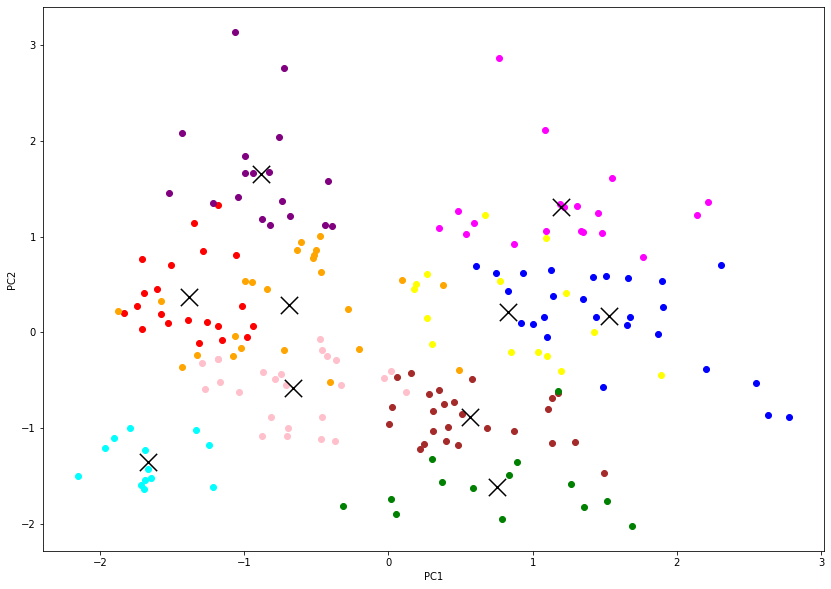

In [ ]:
plt.figure(figsize=(14, 10))

plt.scatter(reduced_data[reduced_data['cluster'] == 0].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 0].loc[:, 'PC2'], color='red')
plt.scatter(reduced_data[reduced_data['cluster'] == 1].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 1].loc[:, 'PC2'], color='blue')
plt.scatter(reduced_data[reduced_data['cluster'] == 2].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 2].loc[:, 'PC2'], color='yellow')
plt.scatter(reduced_data[reduced_data['cluster'] == 3].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 3].loc[:, 'PC2'], color='orange')
plt.scatter(reduced_data[reduced_data['cluster'] == 4].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 4].loc[:, 'PC2'], color='cyan')
plt.scatter(reduced_data[reduced_data['cluster'] == 5].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 5].loc[:, 'PC2'], color='magenta')
plt.scatter(reduced_data[reduced_data['cluster'] == 6].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 6].loc[:, 'PC2'], color='brown')
plt.scatter(reduced_data[reduced_data['cluster'] == 7].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 7].loc[:, 'PC2'], color='pink')
plt.scatter(reduced_data[reduced_data['cluster'] == 8].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 8].loc[:, 'PC2'], color='green')
plt.scatter(reduced_data[reduced_data['cluster'] == 9].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 9].loc[:, 'PC2'], color='purple')

plt.scatter(reduced_centers[:, 0], reduced_centers[:, 1], color='black', marker='x', s=300)

plt.xlabel("PC1")
plt.ylabel("PC2")

plt.show()